In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('indian population new.csv')

In [3]:
useful_data = data[['Year','Population','% Increase in Population']]

In [4]:
useful_data.shape

(73, 3)

<BarContainer object of 25 artists>

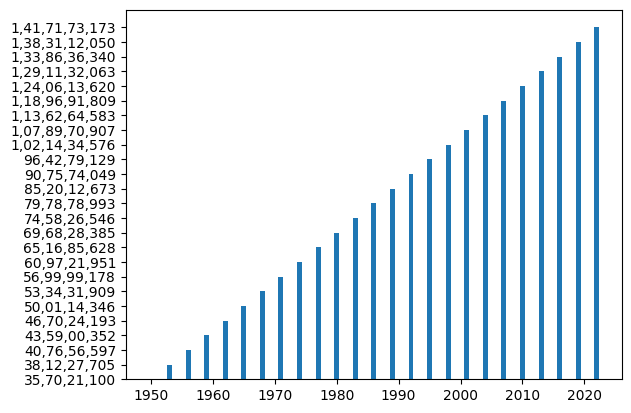

In [7]:
plt.bar(useful_data['Year'][::3],useful_data['Population'][::3])

In [15]:
X_train

0       35,70,21,100
1       36,49,22,360
2       37,29,97,188
3       38,12,27,705
4       38,97,31,406
           ...      
65    1,32,28,66,505
66    1,33,86,36,340
67    1,35,41,95,680
68    1,36,90,03,306
69    1,38,31,12,050
Name: Population, Length: 70, dtype: object

ARIMA MODEL

In [14]:
from statsmodels.tsa.arima.model import ARIMA
X_train,X_test = useful_data['Population'][:70] , useful_data['Population'][70:]
model = ARIMA(pd.Series(X_train))
model_fit = model.fit()
print(model_fit.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).